   User ID       Timestamp                                          Image URL  \
0      NaN  7/9/2022 22:54                                                NaN   
1      NaN  7/9/2022 22:56  https://cdn.discordapp.com/attachments/9954312...   
2      NaN             NaN  https://cdn.discordapp.com/attachments/9954312...   
3      NaN             NaN  https://cdn.discordapp.com/attachments/9954312...   
4      NaN             NaN  https://cdn.discordapp.com/attachments/9954312...   

                                      Message Prompt  
0  /imagine prompt:Scientist prodding at the demo...  
1  the light destroying the darkness - @kevindead...  
2        mona lisa's face is a maze - @kevindead3333  
3  different bacillus cells fighting each other i...  
4  A cult gathering and rally against a calm sere...  
Index(['User ID', 'Timestamp', 'Image URL', 'Message Prompt'], dtype='object')


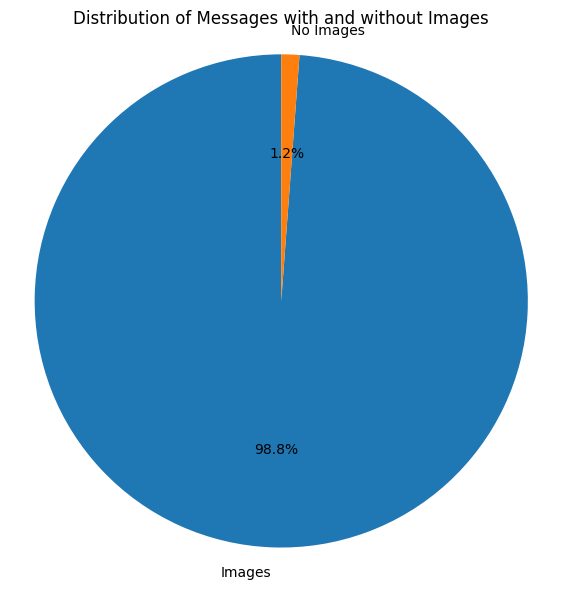

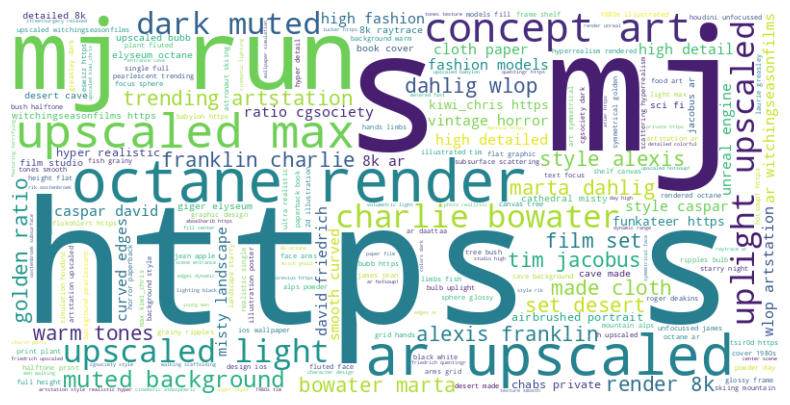

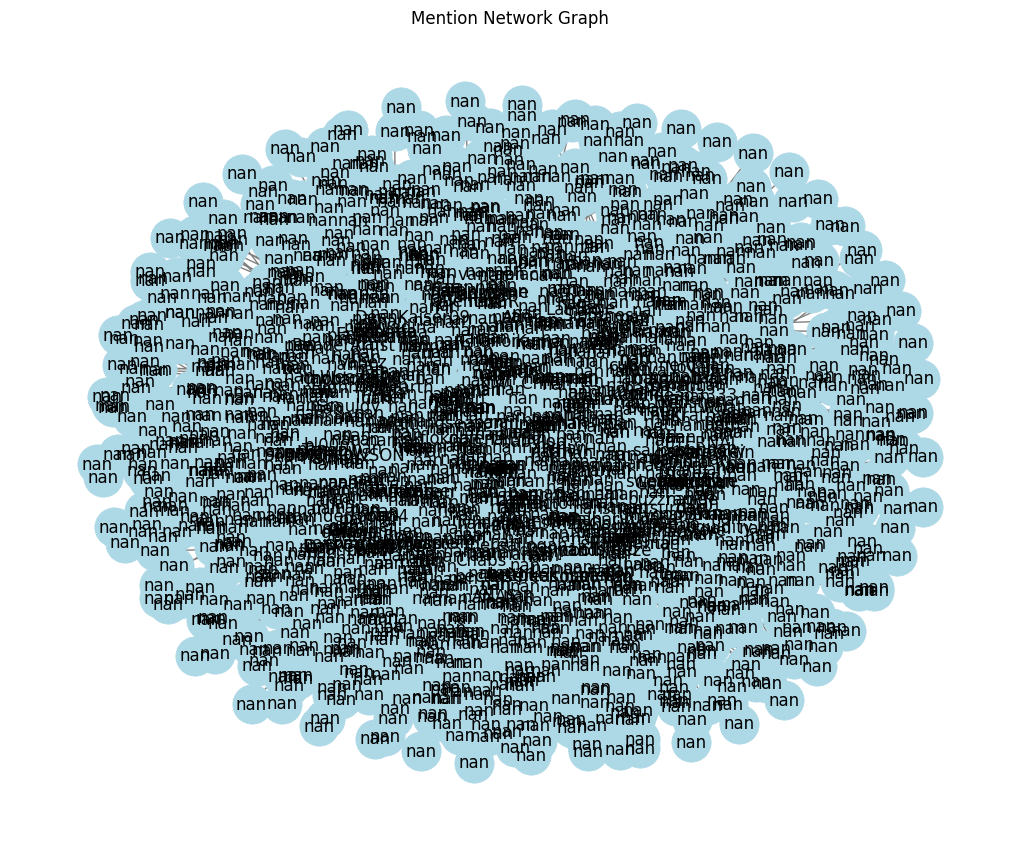

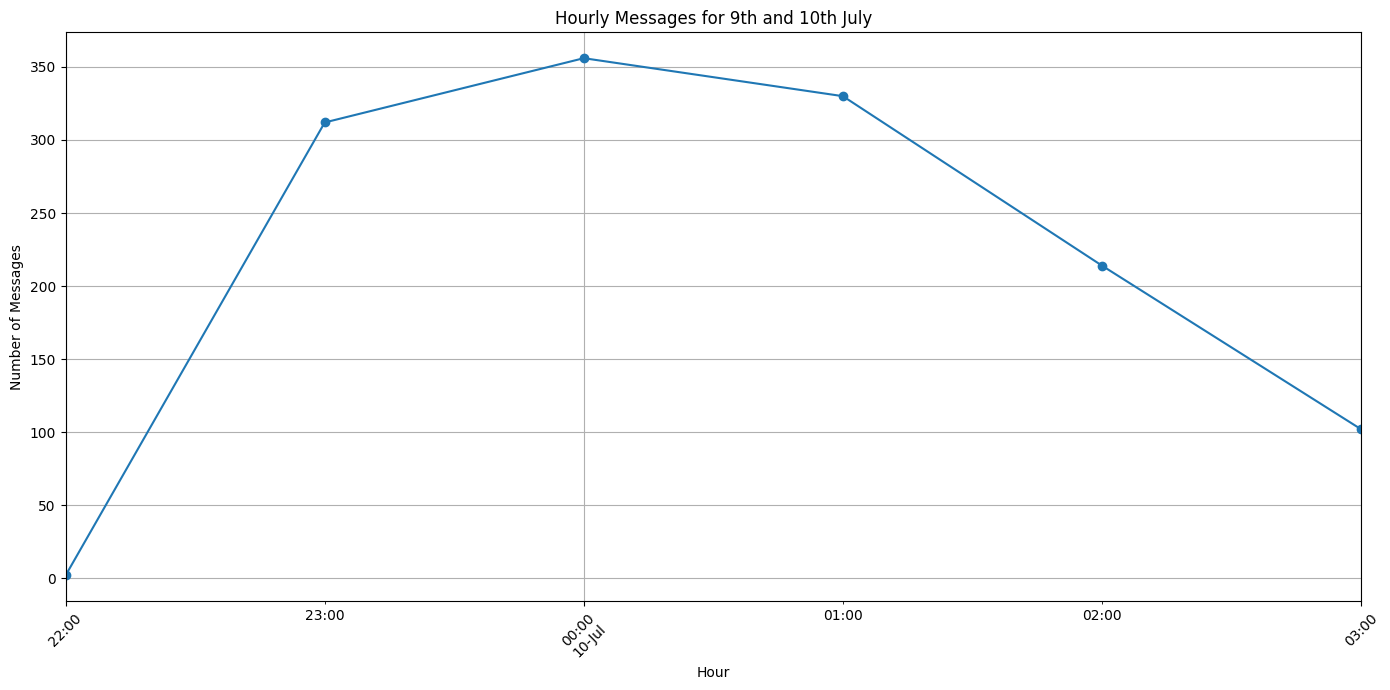

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud

# Load the DataFrame
df = pd.read_csv('/content/chat_log_extracted (1).csv')

# Display the first few rows of the DataFrame
print(df.head())

# Display column names
print(df.columns)

# Count the number of non-null image URLs
image_link_count = df['Image URL'].notna().sum()

# Visualize the presence of image links
labels = ['Images', 'No Images']
sizes = [image_link_count, len(df) - image_link_count]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Messages with and without Images')
plt.show()

# Filter and clean the text data for word cloud visualization
words = df['Message Prompt'].dropna().str.lower().str.cat(sep=' ').split()
cleaned_words = [word for word in words if word not in stopwords.words('english')]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Assuming mentions are tagged as '@username' in the Message Prompt
df['Mentions'] = df['Message Prompt'].str.findall(r'@(\w+)')

# Create mention network graph
G = nx.Graph()
for index, row in df.iterrows():
    user_id = row['User ID']
    mentions = row['Mentions']
    if isinstance(mentions, list):
        for mention in mentions:
            G.add_edge(user_id, mention)

# Draw mention network graph
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, edge_color='gray', linewidths=0.5)
plt.title('Mention Network Graph')
plt.show()

# Resample data by hour and count messages
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.set_index('Timestamp', inplace=True)
hourly_messages = df.resample('H').size()

# Plotting the hourly messages
plt.figure(figsize=(14, 7))
hourly_messages.plot(kind='line', marker='o', linestyle='-')
plt.title('Hourly Messages for 9th and 10th July')
plt.xlabel('Hour')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


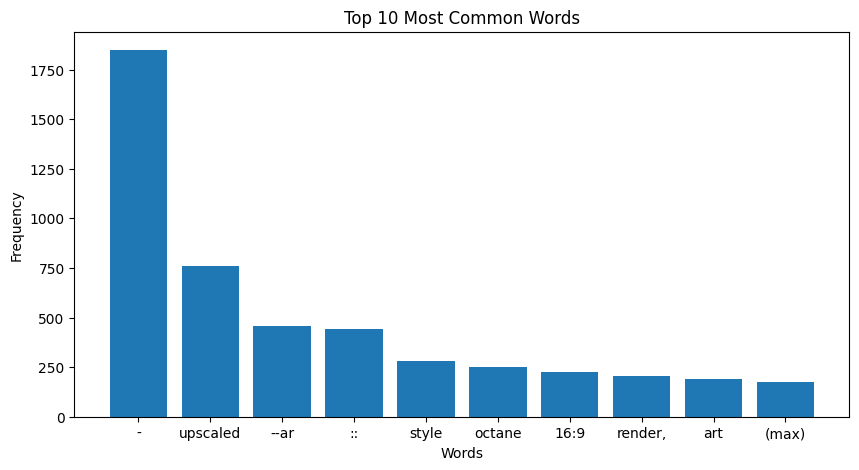

In [8]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Filter and clean the text data
words = df['Message Prompt'].dropna().str.lower().str.cat(sep=' ').split()
cleaned_words = [word for word in words if word not in stopwords.words('english')]

# Count word frequency
word_frequency = Counter(cleaned_words)

# Most common words
most_common_words = word_frequency.most_common(10)

# Plotting the word frequencies
words, freqs = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()



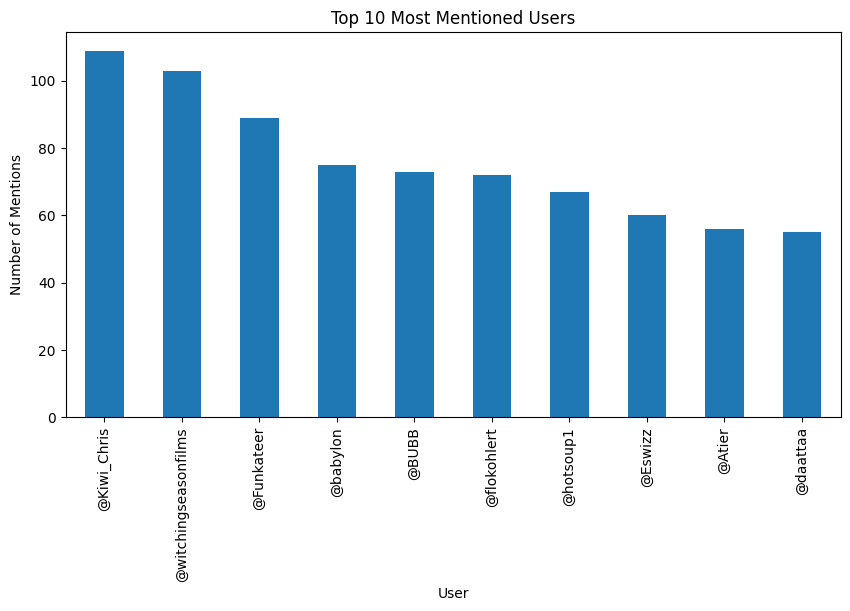

In [9]:
# Assuming mentions are tagged as '@username' in the Message Prompt
df['mentions'] = df['Message Prompt'].str.findall(r'@\w+')

# Count mentions
mention_counts = df['mentions'].explode().value_counts()

# Plot top 10 mentions
mention_counts.head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Most Mentioned Users')
plt.xlabel('User')
plt.ylabel('Number of Mentions')
plt.show()


In [12]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('/content/chat_log_extracted (1).csv')

# Convert 'Timestamp' to datetime, coercing errors which will NaT (Not a Time) for invalid or missing timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Optional: Drop rows where 'Timestamp' is NaT if these rows are not needed
df = df.dropna(subset=['Timestamp'])

# Display the DataFrame to confirm changes
print(df.head(20))


    User ID           Timestamp  \
0       NaN 2022-07-09 22:54:00   
1       NaN 2022-07-09 22:56:00   
5       NaN 2022-07-09 23:00:00   
6       NaN 2022-07-09 23:00:00   
7       NaN 2022-07-09 23:00:00   
11      NaN 2022-07-09 23:02:00   
12      NaN 2022-07-09 23:03:00   
14      NaN 2022-07-09 23:03:00   
15      NaN 2022-07-09 23:03:00   
16      NaN 2022-07-09 23:03:00   
17      NaN 2022-07-09 23:03:00   
18      NaN 2022-07-09 23:03:00   
20      NaN 2022-07-09 23:04:00   
21      NaN 2022-07-09 23:04:00   
22      NaN 2022-07-09 23:04:00   
23      NaN 2022-07-09 23:05:00   
25      NaN 2022-07-09 23:05:00   
26      NaN 2022-07-09 23:05:00   
27      NaN 2022-07-09 23:05:00   
28      NaN 2022-07-09 23:05:00   

                                            Image URL  \
0                                                 NaN   
1   https://cdn.discordapp.com/attachments/9954312...   
5   https://cdn.discordapp.com/attachments/9954312...   
6   https://cdn.discordapp.com/attac

In [19]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Message Prompt': [
        "the light destroying the darkness - @kevindead",
        "mona lisa's face is a maze - @kevindead3333",
        "different bacillus cells fighting each other in space - @emmaa",
        "A cult gathering and rally against a calm serene sunset - @mike"
    ]
}

df = pd.read_csv('/content/chat_log_extracted (1).csv')

# Extract mentions from message prompts
df['Mentions'] = df['Message Prompt'].str.findall(r'@(\w+)')

print(df)


      User ID       Timestamp  \
0         NaN  7/9/2022 22:54   
1         NaN  7/9/2022 22:56   
2         NaN             NaN   
3         NaN             NaN   
4         NaN             NaN   
...       ...             ...   
1858      NaN  7/10/2022 3:43   
1859      NaN             NaN   
1860      NaN             NaN   
1861      NaN  7/10/2022 3:43   
1862      NaN             NaN   

                                              Image URL  \
0                                                   NaN   
1     https://cdn.discordapp.com/attachments/9954312...   
2     https://cdn.discordapp.com/attachments/9954312...   
3     https://cdn.discordapp.com/attachments/9954312...   
4     https://cdn.discordapp.com/attachments/9954312...   
...                                                 ...   
1858  https://cdn.discordapp.com/attachments/9954312...   
1859  https://cdn.discordapp.com/attachments/9954312...   
1860  https://cdn.discordapp.com/attachments/9954312...   
1861  https:/

In [23]:
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes (users) to the graph
G.add_nodes_from(df['User ID'].dropna())

# Add edges (mentions) to the graph
for index, row in df.iterrows():
    user_id = row['User ID']
    mentions = row['Mentions']

    # Check if mentions is a list
    if isinstance(mentions, list):
        for mention in mentions:
            G.add_edge(user_id, mention)

# Now you can analyze the graph using NetworkX's functions
# For example, you can calculate centrality measures, perform community detection, or visualize the graph
